В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [5]:
medical_df = pd.read_csv('/content/drive/MyDrive/5ML_2526/Lec_Notebook/Files/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [6]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

y = non_smoker_df['charges']
X = non_smoker_df['age']
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
MNK_coefs = normal_equations(X_with_intercept, y)
np.dot(X_with_intercept[0], MNK_coefs)
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
rmse_mnk = np.sqrt(np.mean((y - predictions_MNK) ** 2))
MNK_coefs, predictions_MNK, rmse_mnk

(array([-2091.42055657,   267.24891283]),
 array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
        2719.0598744 , 3520.80661289]),
 np.float64(4662.505766636395))

In [7]:
X1 = X.to_frame()

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg
lin_reg.fit(X1, y)
lin_reg.coef_, lin_reg.intercept_
predictions_sklearn = lin_reg.predict(X1)
rmse_sklearn = np.sqrt(np.mean((y - predictions_sklearn) ** 2))
lin_reg.coef_, predictions_sklearn, rmse_sklearn

(array([267.24891283]),
 array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
        2719.0598744 , 3520.80661289]),
 np.float64(4662.505766636395))

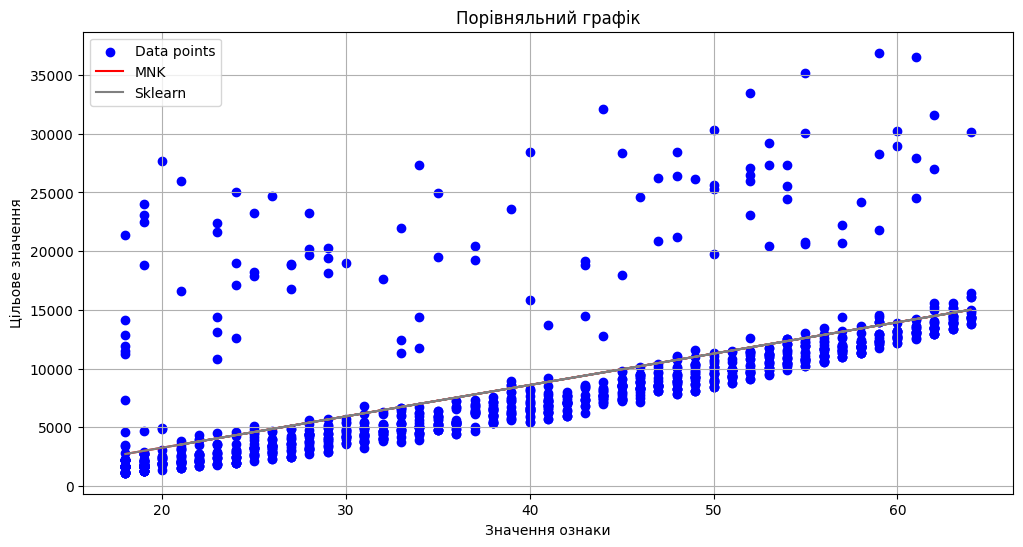

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X1, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Порівняльний графік')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Значення моделей не відрізняються; значення відрізняються від припущень

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

[305.23760211]


array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

10711.00334810241


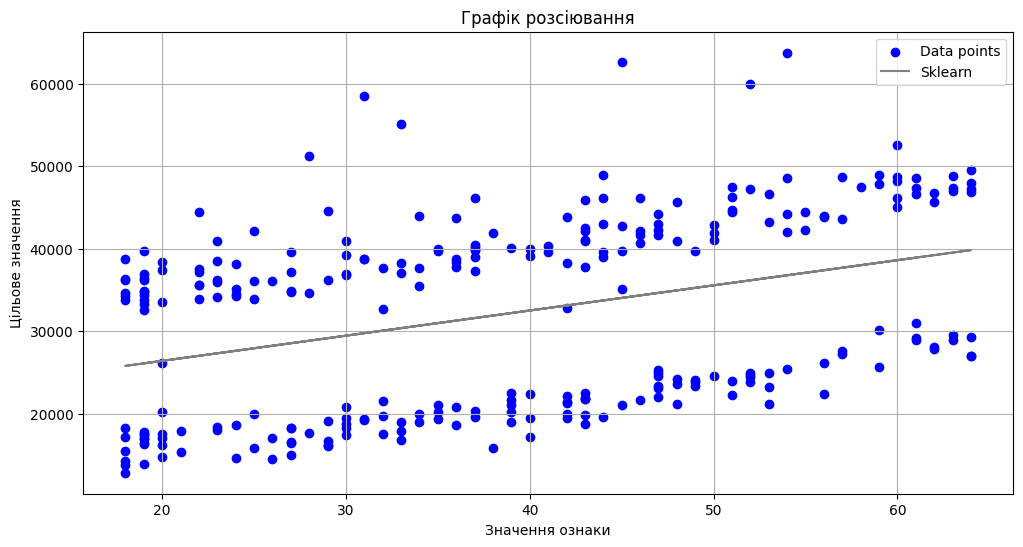

In [13]:
smoker_df = medical_df[medical_df.smoker == 'yes']
B = smoker_df['charges']
A = smoker_df['age']
A1 = A.to_frame()

lin_reg = LinearRegression()
lin_reg
lin_reg.fit(A1, B)
lin_reg.coef_, lin_reg.intercept_
predictions_sklearn1 = lin_reg.predict(A1)
rmse_sklearn1 = np.sqrt(np.mean((B - predictions_sklearn1) ** 2))
print(lin_reg.coef_)
display(predictions_sklearn1)
print(rmse_sklearn1)

plt.figure(figsize=(12, 6))
plt.scatter(A1, B, color='blue', label='Data points')
plt.plot(A1, predictions_sklearn1, color='grey', label='Sklearn')
plt.title('Графік розсіювання')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Модель не вдала, варто розглянути інші варіанти